In [1]:
import numpy as np
import pandas as pd 

In [4]:
X_train = pd.read_csv('작업형제2유형/X_train.csv', encoding='CP949')
y_train = pd.read_csv('작업형제2유형/y_train.csv', encoding ='CP949')
X_test = pd.read_csv('작업형제2유형/X_test.csv', encoding = 'CP949')

In [6]:
X_train.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85


In [7]:
y_train.head()

,cust_id,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0


# DATA Preprocessing 

In [8]:
X_train.describe()

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기
count,3500.000000,3.500000e+03,3.500000e+03,1.205000e+03,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,9.191925e+07,1.966424e+07,2.407822e+07,19.253714,2.834963,0.307246,20.958286
std,1010.507298,1.635065e+08,3.199235e+07,4.746453e+07,27.174942,1.912368,0.289752,24.748682
min,0.000000,-5.242152e+07,-2.992000e+06,5.600000e+03,1.000000,1.000000,0.000000,0.000000
25%,874.750000,4.747050e+06,2.875000e+06,2.259000e+06,2.000000,1.666667,0.027291,4.000000
50%,1749.500000,2.822270e+07,9.837000e+06,7.392000e+06,8.000000,2.333333,0.256410,13.000000
75%,2624.250000,1.065079e+08,2.296250e+07,2.412000e+07,25.000000,3.375000,0.448980,28.000000
max,3499.000000,2.323180e+09,7.066290e+08,5.637530e+08,285.000000,22.083333,1.000000,166.000000


In [23]:
X_train.isnull().sum()

cust_id       0
총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [25]:
# 결측치 처리 : 환불금액 -> 0 
X_train.fillna(0, inplace = True)

In [28]:
X_test.fillna(0, inplace = True)

In [29]:
X_train[X_train['총구매액'] < 0 ]

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
1659,1659,-2992000,-2992000,2992000.0,디자이너,본 점,1,1.000000,0.000000,0
3174,3174,-52421520,13616000,97222000.0,기타,본 점,18,4.444444,0.337500,16
3488,3488,-18905600,82306000,529602320.0,디자이너,부산본점,31,1.064516,0.242424,11


In [31]:
X_train[X_train['최대구매액'] < 0 ]

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
1659,1659,-2992000,-2992000,2992000.0,디자이너,본 점,1,1.0,0.0,0


In [35]:
X_train['총구매액'] = np.abs(X_train['총구매액'])
X_train['최대구매액'] = np.abs(X_train['최대구매액'])

In [37]:
X_train.tail()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
3495,3495,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40
3497,3497,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0
3498,3498,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39
3499,3499,263101550,34632000,5973000.0,기타,본 점,38,2.421053,0.467391,8


In [65]:
X_test['총구매액'] = np.abs(X_test['총구매액'])
X_test['최대구매액'] = np.abs(X_test['최대구매액'])

In [38]:
from sklearn.model_selection import train_test_split

In [69]:
X = pd.concat([X_train, X_test])

In [71]:
dum_X = pd.get_dummies(X)

In [75]:
dum_train_x = dum_X.iloc[:3500,:]

In [77]:
dum_test_x = dum_X.iloc[3500:,:]

In [130]:
# 검증 데이터 분할
train_X, test_X, train_y, test_y = train_test_split(dum_train_x, y_train,
                                                   test_size =0.2, random_state = 619)

In [131]:
train_X = train_X.drop('cust_id', axis = 1)

In [132]:
test_X = test_X.drop('cust_id', axis = 1)

In [133]:
train_y = train_y.drop('cust_id', axis = 1)
test_y = test_y.drop('cust_id', axis = 1)

In [87]:
dum_test_x = dum_test_x.drop('cust_id', axis = 1)

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
from sklearn.metrics import roc_auc_score

In [140]:
rf = RandomForestClassifier(n_estimators = 1000, 
                            max_depth = 12, random_state = 619, 
                           n_jobs = -1)

In [142]:
rf.fit(train_X, train_y)

<ipython-input-142-f7c02caa0c6b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_X, train_y)


RandomForestClassifier(max_depth=12, n_estimators=1000, n_jobs=-1,
                       random_state=619)

In [143]:
y_pred = rf.predict_proba(test_X)

In [144]:
roc_auc_score(test_y, y_pred[:,1])

0.6744829506399492

In [145]:
pred = rf.predict_proba(dum_test_x)

In [146]:
y_test = X_test[['cust_id']]

In [147]:
y_test

,cust_id
0,3500
1,3501
2,3502
3,3503
4,3504
...,...
2477,5977
2478,5978
2479,5979
2480,5980


In [148]:
male = pd.Series(pred[:,1], name = 'gender')

In [149]:
submission = pd.concat([y_test, male], axis = 1)

In [150]:
submission.to_csv('submission/sub1.csv', index = False)

In [151]:
submission

,cust_id,gender
0,3500,0.469273
1,3501,0.169563
2,3502,0.191930
3,3503,0.426575
4,3504,0.459119
...,...,...
2477,5977,0.538502
2478,5978,0.536773
2479,5979,0.462226
2480,5980,0.429841


In [152]:
from xgboost import XGBClassifier

In [232]:
xgb =XGBClassifier(n_estimators = 4000, 
                random_state = 619 ,
                  n_jobs = -1, learning_rate = 0.008,
                  max_depth = 4, gamma = 4,
                  subsample = 0.8)

In [233]:
xgb.fit(train_X, train_y,
       eval_metric = 'auc', verbose = 500,
        eval_set=[(train_X, train_y), (test_X, test_y)],
       early_stopping_rounds = 400) 

[0]	validation_0-auc:0.67138	validation_1-auc:0.61839
[500]	validation_0-auc:0.76442	validation_1-auc:0.67269
[1000]	validation_0-auc:0.79102	validation_1-auc:0.67561
[1423]	validation_0-auc:0.80817	validation_1-auc:0.67504


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.008, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=4000, n_jobs=-1, num_parallel_tree=1,
              random_state=619, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [238]:
submission.iloc[:,1] = xgb.predict_proba(dum_test_x)[:,1]

In [239]:
submission

,cust_id,gender
0,3500,0.567591
1,3501,0.177976
2,3502,0.114950
3,3503,0.445185
4,3504,0.457531
...,...,...
2477,5977,0.638249
2478,5978,0.557337
2479,5979,0.578044
2480,5980,0.468608


In [244]:
y_train['gender'].value_counts()

0    2184
1    1316
Name: gender, dtype: int64

In [274]:
from sklearn.linear_model import LogisticRegression

In [286]:
lr = LogisticRegression(random_state = 619, 
                        n_jobs =-1, penalty = 'elasticnet',
                       max_iter = 1000, verbose = 100, solver ='saga', l1_ratio =0.5)

In [287]:
lr.fit(train_X, train_y)

/Users/jihye/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
convergence after 120 epochs took 1 seconds
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(l1_ratio=0.5, max_iter=1000, n_jobs=-1, penalty='elasticnet',
                   random_state=619, solver='saga', verbose=100)

In [279]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [288]:
y_pred = lr.predict_proba(test_X)

In [289]:
roc_auc_score(test_y, y_pred[:,1])

0.6386223038170729

## Scaling 

In [290]:
from sklearn.preprocessing import MinMaxScaler

In [291]:
scaler = MinMaxScaler()

In [295]:
sc_x = scaler.fit_transform(dum_train_x)

In [296]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also Non

In [306]:
train_x, test_x, train_y, test_y = train_test_split(sc_x, y_train,
                                                   test_size = 0.25,
                                                   random_state = 619)

In [307]:
train_y = train_y.drop('cust_id', axis = 1)
test_y = test_y.drop('cust_id', axis = 1)

In [310]:
rf.fit(train_x, train_y)

<ipython-input-310-6356cd160231>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_x, train_y)


RandomForestClassifier(max_depth=12, n_estimators=1000, n_jobs=-1,
                       random_state=619)

In [311]:
pred = rf.predict_proba(test_x)
roc_auc_score(test_y, pred[:,1])

0.6635380829909705

In [316]:
xgb =XGBClassifier(n_estimators = 4000, 
                random_state = 619 ,
                  n_jobs = -1, learning_rate = 0.01,
                  max_depth = 6, gamma = 4)

In [317]:
xgb.fit(train_x, np.ravel(train_y),
       eval_metric = 'auc', verbose = 500,
        eval_set=[(train_x, np.ravel(train_y)), (test_x, np.ravel(test_y))],
       early_stopping_rounds = 400) 

[0]	validation_0-auc:0.71966	validation_1-auc:0.62981
[500]	validation_0-auc:0.81045	validation_1-auc:0.66047
[559]	validation_0-auc:0.81045	validation_1-auc:0.66047


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=4000, n_jobs=-1, num_parallel_tree=1,
              random_state=619, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [318]:
from sklearn.metrics import roc_curve

In [320]:
fprs, tprs, threshols = roc_curve(test_y, pred[:,1])

In [321]:
import matplotlib.pyplot as plt 

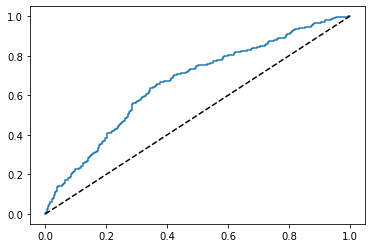

In [322]:
plt.plot(fprs, tprs, label = 'ROC')
plt.plot([0,1], [0,1], 'k--', label ='Random')